
## Supervised classification - improving capacity learning
<hr>

## 0. Import library
<hr>
Import library

In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

import math


## 1. Load and plot the dataset (dataset-noise-01.txt)
<hr>
The data features for each data $i$ are $x_i=(x_{i(1)},x_{i(2)})$.

The data label/target, $y_i$, indicates two classes with value 0 or 1.

Plot the data points.

You may use matplotlib function `scatter(x,y)`.

Number of the data = 1000
Shape of the data = (1000, 3)
Data type of the data = float64


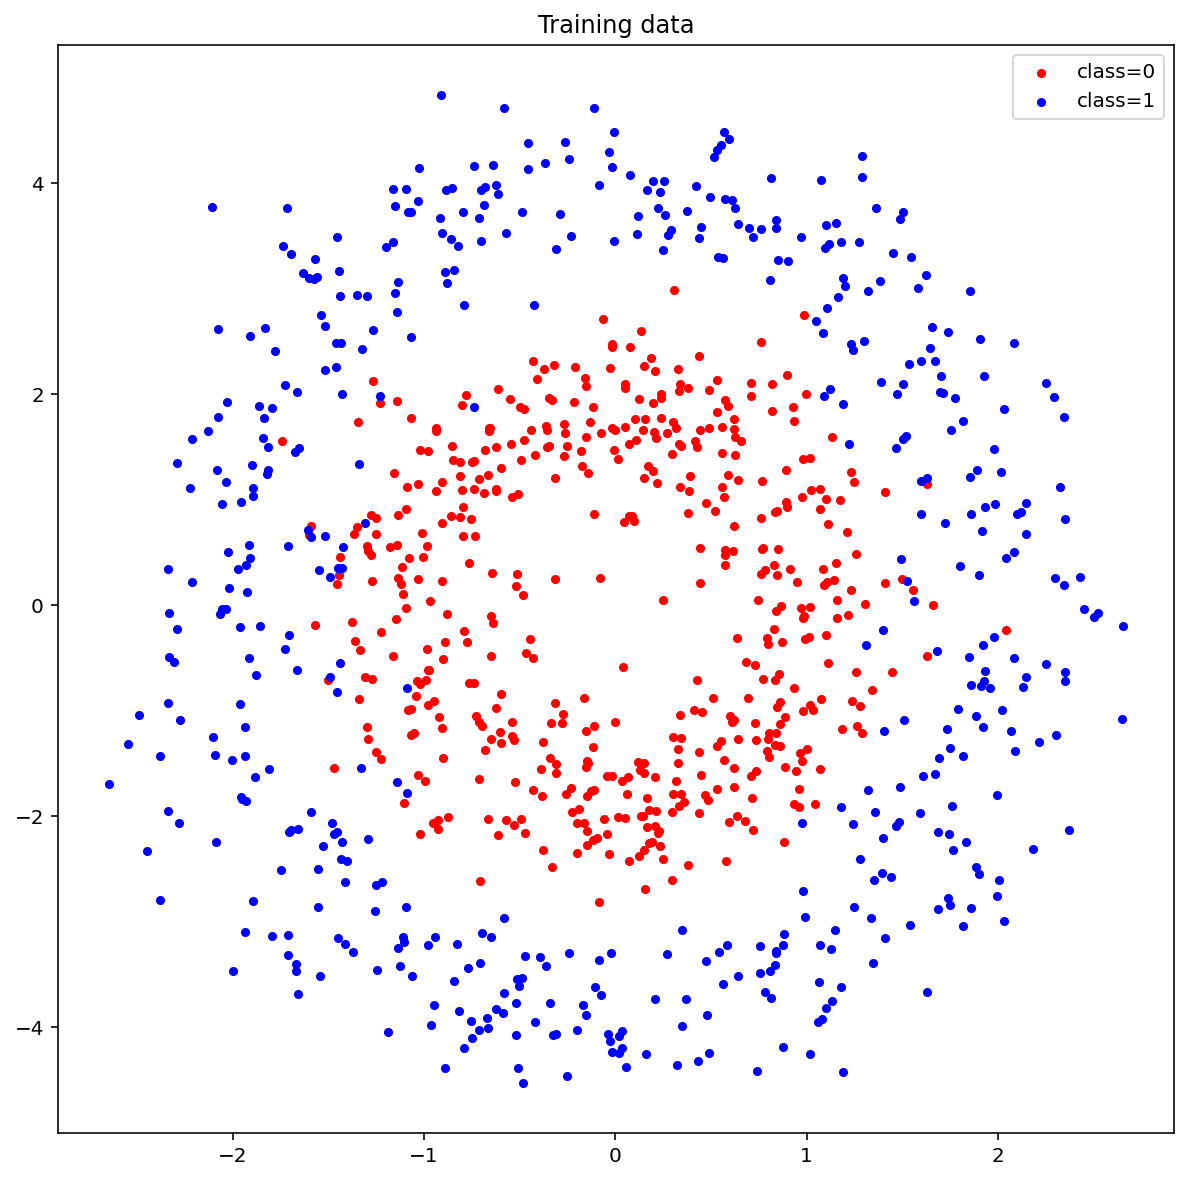

In [3]:
# import data with numpy
data = np.loadtxt('/content/drive/My Drive/Colab Notebooks/MachineLearningProject/05/dataset-a.txt', delimiter=',')

# number of training data
n = data.shape[0] 
print('Number of the data = {}'.format(n))
print('Shape of the data = {}'.format(data.shape))
print('Data type of the data = {}'.format(data.dtype))

# plot
x1 = data[:,0].astype(np.float64) # feature 1
x2 = data[:,1].astype(np.float64) # feature 2
idx = data[:,2].astype(np.float64) # label

#idx_class0 =  # index of class0
#idx_class1 =  # index of class1

x1_idx0    = x1[idx == 0]
x1_idx1    = x1[idx == 1]

x2_idx0    = x2[idx == 0]
x2_idx1    = x2[idx == 1]

plt.figure(1,figsize=(10,10))
plt.scatter(x1_idx0, x2_idx0 , s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_idx1, x2_idx1 , s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()


## 2. Define a logistic regression loss function and its gradient
<hr>

In [4]:
# sigmoid function
def sigmoid(z):
    try:
        return 1 / (1 + np.exp(-z))
    except OverflowError:
        return 1e-9


# predictive function definition
def f_pred(X,w):
    p = np.dot(X,w)    
    return p


# loss function definition
def loss_logreg(y_pred,y):     
    n = len(y)
    #loss = (np.dot((sigmoid(y_pred) - y).T, (sigmoid(y_pred) - y))) / n
    loss = -(np.dot(y.T, np.log(sigmoid(y_pred))) + np.dot((1-y).T, np.log(1-sigmoid(y_pred)))) / n
    return loss


# gradient function definition
def grad_loss(y_pred, y, X):
    n = len(y)
    #grad = 2 * np.dot(X.T, np.dot((sigmoid(y_pred)-y), np.dot(sigmoid(y_pred).T, (1-sigmoid(y_pred))))) / len(y_pred)
    grad = 2 * np.dot(X.T, (sigmoid(y_pred) - y)) / n
    return grad


# gradient descent function definition
def grad_desc(X, y , w_init, tau, max_iter):

    L_iters = np.zeros([max_iter]) # record the loss values
    w = w_init # initialization
    for i in range(max_iter): # loop over the iterations
        y_pred = f_pred(X,w) # linear predicition function  
        grad_f = grad_loss(y_pred,y,X) # gradient of the loss 
        w = w - tau* grad_f # update rule of gradient descent 
        L_iters[i] = loss_logreg(y_pred,y) # save the current loss value 
        
    return w, L_iters

## 3. define a prediction function and run a gradient descent algorithm
<hr>

The logistic regression/classification predictive function is defined as:

$$
\begin{aligned}
p_w(x) &= \sigma(X w)
\end{aligned}
$$

The prediction function can be defined in terms of the following feature functions $f_i$ as follows:

$$
X = 
\left[ 
\begin{array}{cccccc}
f_0(x_1) & f_1(x_1) & f_2(x_1) & f_3(x_1) & f_4(x_1) & f_5(x_1) & f_6(x_1) & f_7(x_1) & f_8(x_1) & f_9(x_1) \\
f_0(x_2) & f_1(x_2) & f_2(x_2) & f_3(x_2) & f_4(x_2) & f_5(x_2) & f_6(x_2) & f_7(x_2) & f_8(x_2) & f_9(x_2) \\
\vdots\\
f_0(x_n) & f_1(x_n) & f_2(x_n) & f_3(x_n) & f_4(x_n) & f_5(x_n) & f_6(x_n) & f_7(x_n) & f_8(x_n) & f_9(x_n) \\
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2 \\ 
w_3 \\ 
w_4 \\ 
w_5 \\
w_6 \\ 
w_7 \\ 
w_8 \\ 
w_9
\end{array} 
\right]
\quad
$$

where $x_i = (x_i(1), x_i(2))$ and you can define a feature function $f_i$ as you want.

You can use at most 10 feature functions $f_i$, $i = 0, 1, 2, \cdots, 9$ in such a way that the classification accuracy is maximized. You are allowed to use less than 10 feature functions.

Implement the logistic regression function with gradient descent using a vectorization scheme.

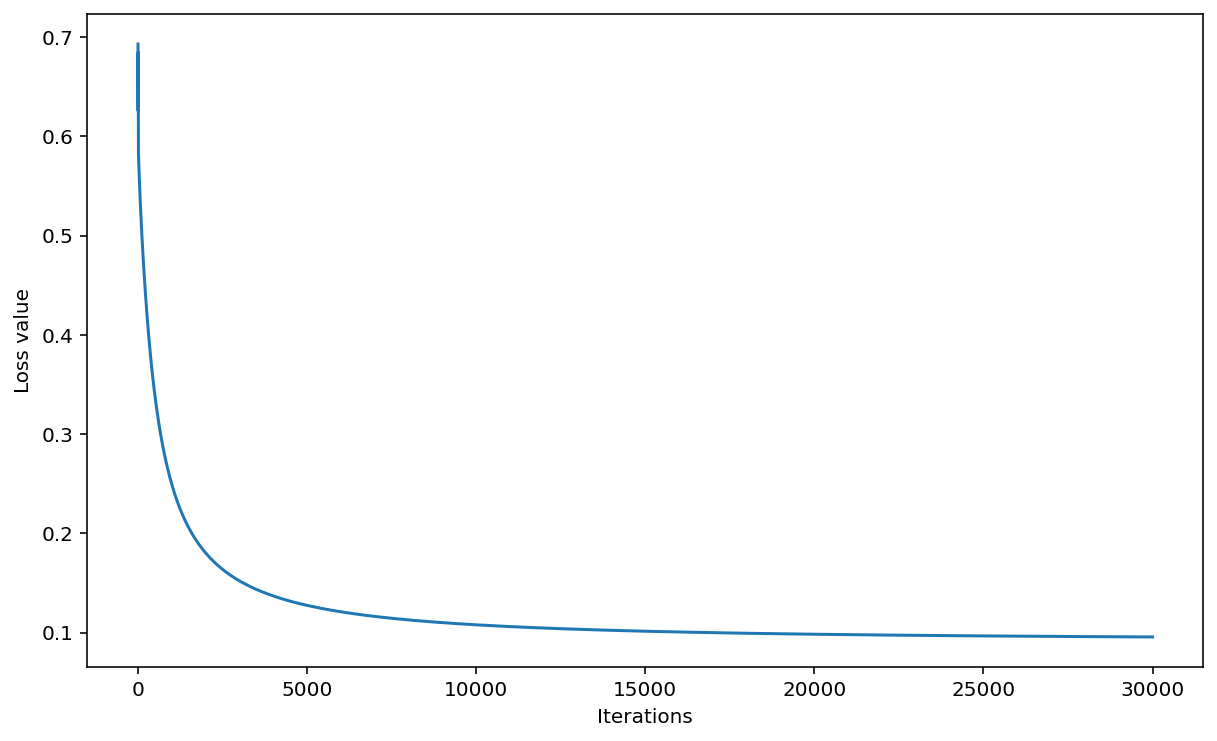

In [5]:
import math
# construct the data matrix X, and label vector y

def poly(X1, X2, degree):
    func = np.ones(len(X1))
    for i in range(1, degree+1):
        for j in range(0, i+1):
            func = np.column_stack((func, (X1**(i-j)) * (X2**j)))
    return func

n = data.shape[0]
#X = np.array([[1,x1,x2] for x1,x2 in zip(x1, x2)])
X = poly(x1, x2, 3)
y = data[:,2][:,None] # label 


# run gradient descent algorithm
start = time.time()
w_init = np.array([0,0,0,0,0,0,0,0,0,0])[:,None]
tau = 1e-2; max_iter = 30000
w, L_iters = grad_desc(X,y,w_init,tau,max_iter)

# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 4. Plot the decisoin boundary
<hr>

In [6]:
## compute values p(x) for multiple data points x
#x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
#x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2

#xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
#xx1, xx2, xx3, xx4, xx5, xx6 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max), np.linspace(x3_min, x3_max), np.linspace(x4_min, x4_max), np.linspace(x5_min, x5_max), np.linspace(x6_min, x6_max)) # create meshgrid

#X2 = np.ones([np.prod(xx1.shape),10])
#X2[:,1] = xx1.reshape(-1)
#X2[:,2] = xx2.reshape(-1)

#p = f_pred(X2,w)
#p = p.reshape(50,50)

## plot
#plt.figure(4,figsize=(12,10))

##ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
##cbar = plt.colorbar(ax)
##cbar.update_ticks()

#plt.scatter(x1_idx0, x2_idx0 , s=50, c='r', marker='.', label='Class=0') 
#plt.scatter(x1_idx1, x2_idx1 , s=50, c='b', marker='.', label='Class=1')
#plt.contour(xx1, xx2, p, linewidths=2, colors='k') 
#plt.legend()
#plt.title('Decision boundary (quadratic)')
#plt.show()

In [16]:
def boundary(x1_0, x2_0, x1_1, x2_1, w, degree):
    plt.figure(figsize=(12, 10))
    plt.scatter(x1_0, x2_0, s=50, c='r', marker='.', label='Class=0')
    plt.scatter(x1_1, x2_1, s=50, c='b', marker='.', label='Class=1')

    X = np.linspace(-3, 3, 100)
    Y = np.linspace(-5, 5, 100)
    XX, YY = np.meshgrid(X,Y)
    XX = np.ravel(XX)
    YY = np.ravel(YY)

    Z = np.zeros((len(X)*len(Y)))
    poly_line = poly(XX, YY, degree)
    Z = poly_line.dot(w)
  
    XX = XX.reshape((len(X), len(Y)))
    YY = YY.reshape((len(X), len(Y)))
    Z = Z.reshape((len(X), len(Y)))
    plt.contour(XX, YY, Z, levels=[0], colors='k')
    plt.show()

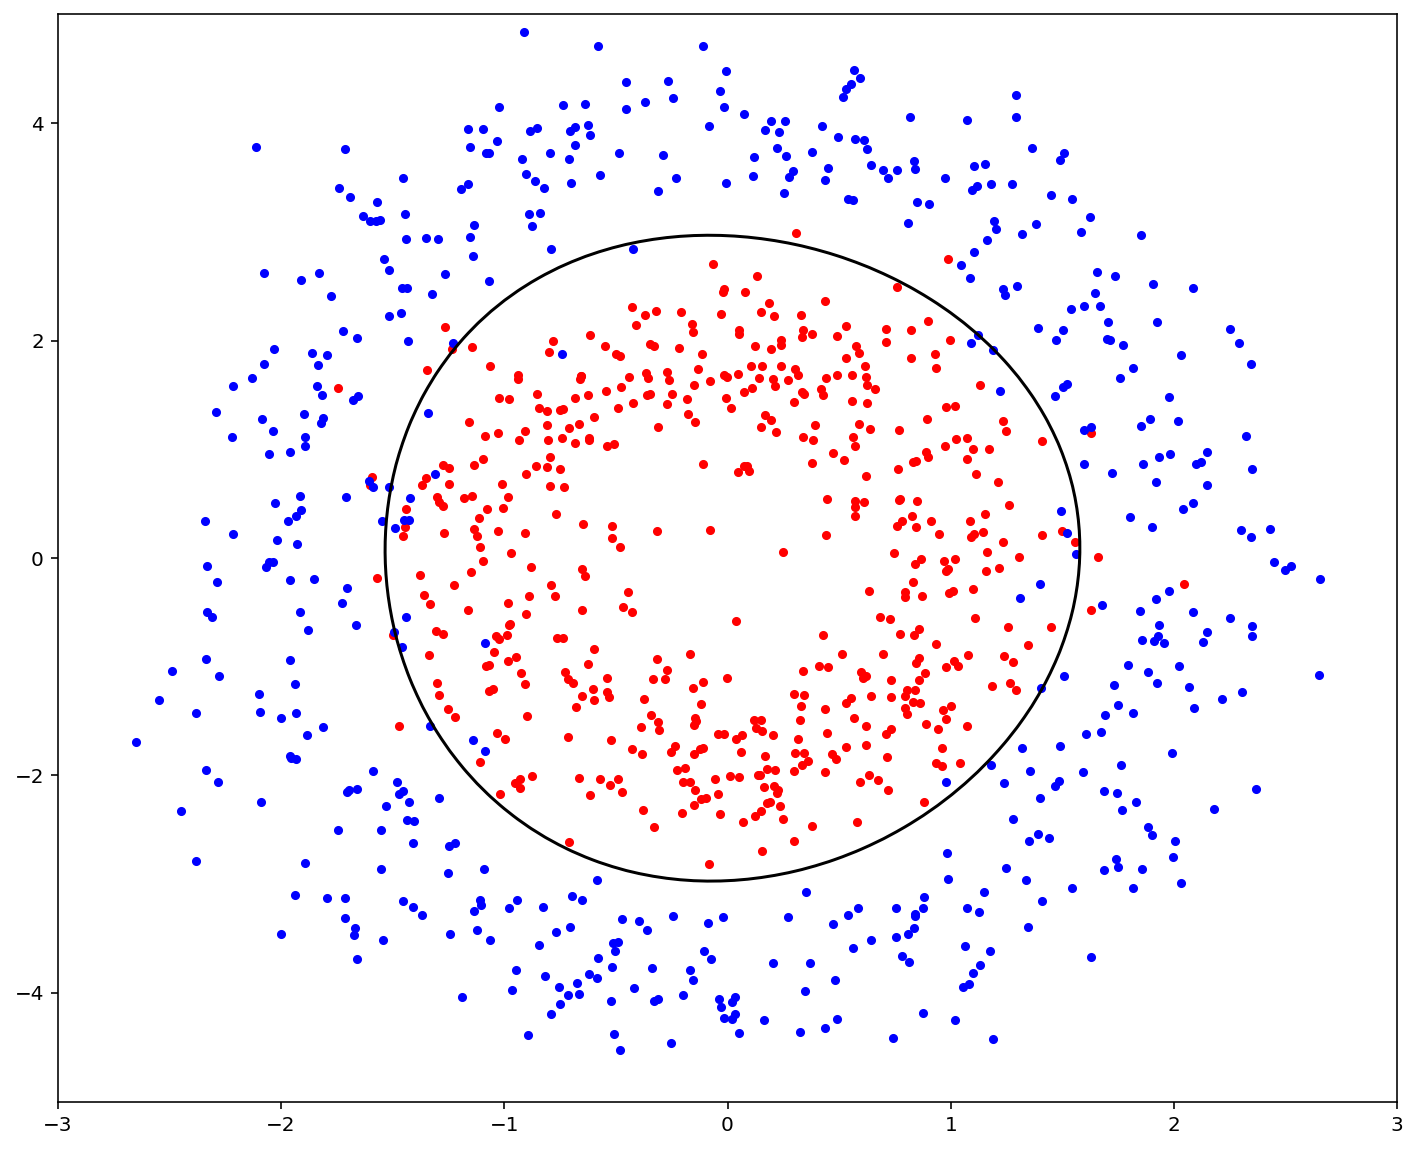

In [17]:
boundary(x1_idx0, x2_idx0, x1_idx1, x2_idx1, w, 3)

## 5. Plot the probability map
<hr>

In [14]:
'''
# compute values p(x) for multiple data points x
x1_min, x1_max =  # min and max of grade 1
x2_min, x2_max =  # min and max of grade 2
xx1, xx2 =  # create meshgrid

X2 = 
p = f_pred( )
p = p.reshape( )

# plot
plt.figure(4,figsize=(12,10))

ax = plt.contourf( )
cbar = plt.colorbar( )
cbar.update_ticks()

plt.scatter( , s=50, c='r', marker='.', label='Class0') 
plt.scatter( , s=50, c='b', marker='.', label='Class1')
plt.contour( ) 
plt.legend()
plt.title('')
plt.show()
'''

"\n# compute values p(x) for multiple data points x\nx1_min, x1_max =  # min and max of grade 1\nx2_min, x2_max =  # min and max of grade 2\nxx1, xx2 =  # create meshgrid\n\nX2 = \np = f_pred( )\np = p.reshape( )\n\n# plot\nplt.figure(4,figsize=(12,10))\n\nax = plt.contourf( )\ncbar = plt.colorbar( )\ncbar.update_ticks()\n\nplt.scatter( , s=50, c='r', marker='.', label='Class0') \nplt.scatter( , s=50, c='b', marker='.', label='Class1')\nplt.contour( ) \nplt.legend()\nplt.title('')\nplt.show()\n"

In [84]:
def boundary_map(x1_0, x2_0, x1_1, x2_1, w, degree):
    plt.figure(4, figsize=(12, 10))

    X = np.linspace(-3, 3, 100)
    Y = np.linspace(-5, 5, 100)
    XX, YY = np.meshgrid(X,Y)
    XX = np.ravel(XX)
    YY = np.ravel(YY)

    Z = np.zeros((len(X)*len(Y)))
    poly_line = poly(XX, YY, degree)
    Z = poly_line.dot(w)
  
    XX = XX.reshape((len(X), len(Y)))
    YY = YY.reshape((len(X), len(Y)))
    Z = Z.reshape((len(X), len(Y)))

    ax = plt.contourf(XX,YY,Z,2500,vmin=-1,vmax=1,cmap='coolwarm', alpha=0.2,extend='both')
    cbar = plt.colorbar(ax)
    cbar.update_ticks()

    plt.scatter(x1_0, x2_0, s=50, c='r', marker='.', label='Class=0')
    plt.scatter(x1_1, x2_1, s=50, c='b', marker='.', label='Class=1')
    plt.contour(XX, YY, Z, levels=[0], colors='k')
    plt.legend()
    plt.title('Decision Boundary (quadratic)')
    plt.show()

In [85]:
boundary_map(x1_idx0, x2_idx0, x1_idx1, x2_idx1, w, 3)

Output hidden; open in https://colab.research.google.com to view.

## 6. Compute the classification accuracy
<hr>

### The accuracy is computed by:

$$
\textrm{accuracy} = \frac{\textrm{number of correctly classified data}}{\textrm{total number of data}}
$$

In [ ]:
# compute the accuracy of the classifier
n = data.shape[0]

# plot
x1 =   # feature 1
x2 =   # feature 2
idx_class0 =   # index of class0
idx_class1 =   # index of class1

X2 = 
p = f_pred( )

idx_class1_pred = (np.array(np.round(sigmoid(p)) == label_tmp))

#print(idx_class1_label)
#print(idx_class1_pred)

idx_wrong = ( )

#print(np.sum(idx_wrong))
print('total number of data = {}'.format(n))
print('total number of correctly classified data = ', ( ))
print('accuracy(%) = ',  )

total number of data = 1000
total number of correctly classified data =  959
accuracy(%) =  95.89999999999999


## Output using the dataset (dataset-noise-01.txt)
<hr>

## 1. Visualize the data [1pt]
<ht>

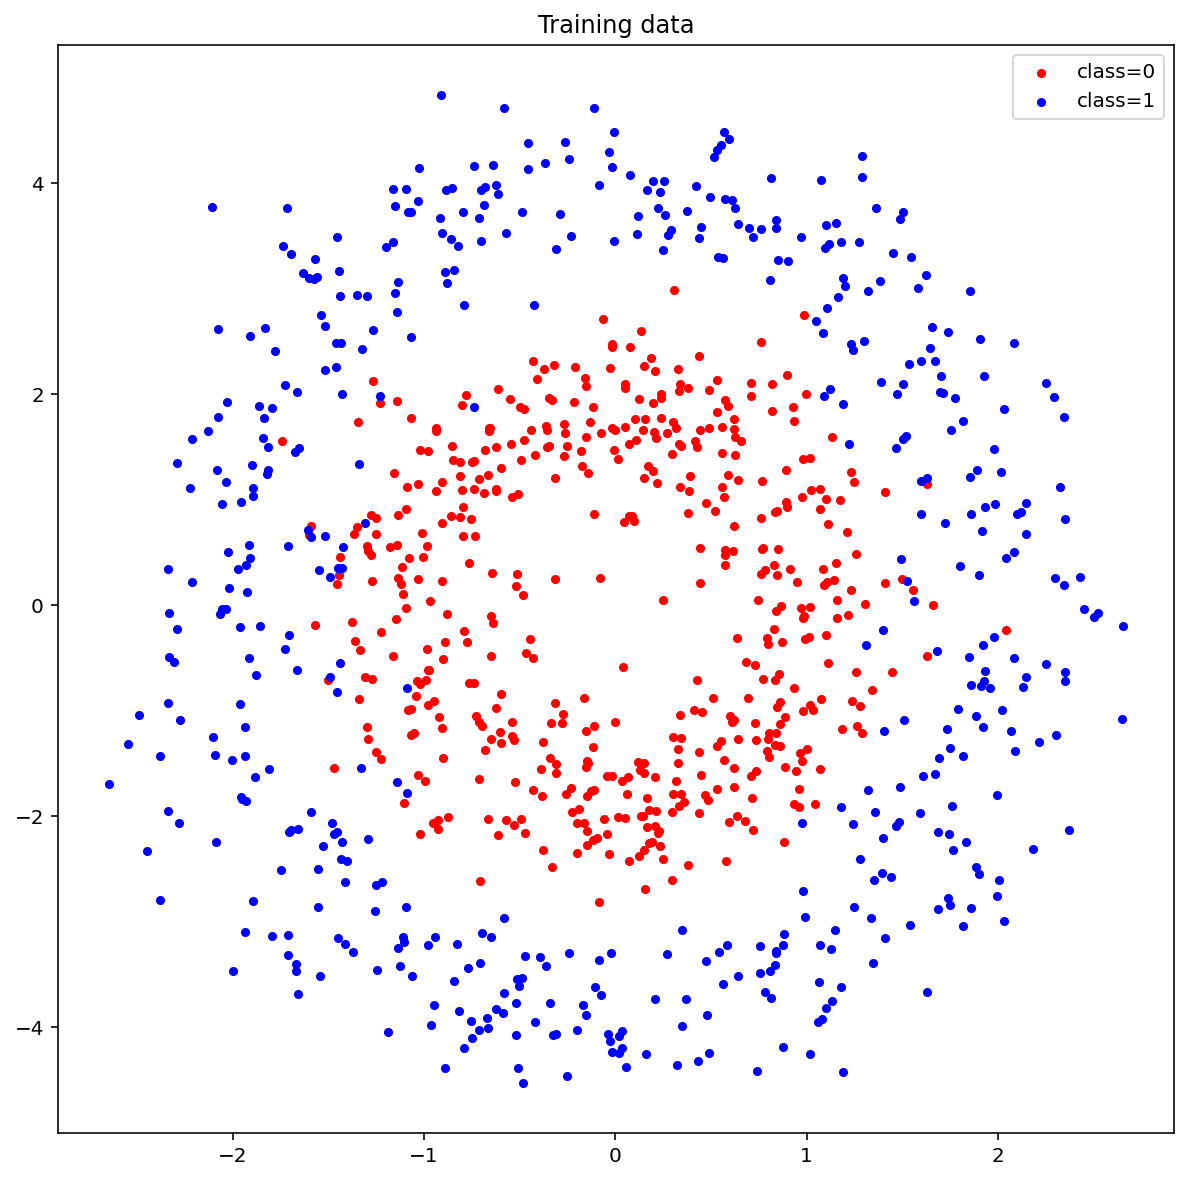

In [ ]:
plt.figure(1,figsize=(10,10))
plt.scatter(x1_idx0, x2_idx0 , s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1_idx1, x2_idx1 , s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

## 2. Plot the loss curve obtained by the gradient descent until the convergence [2pt]
<hr>

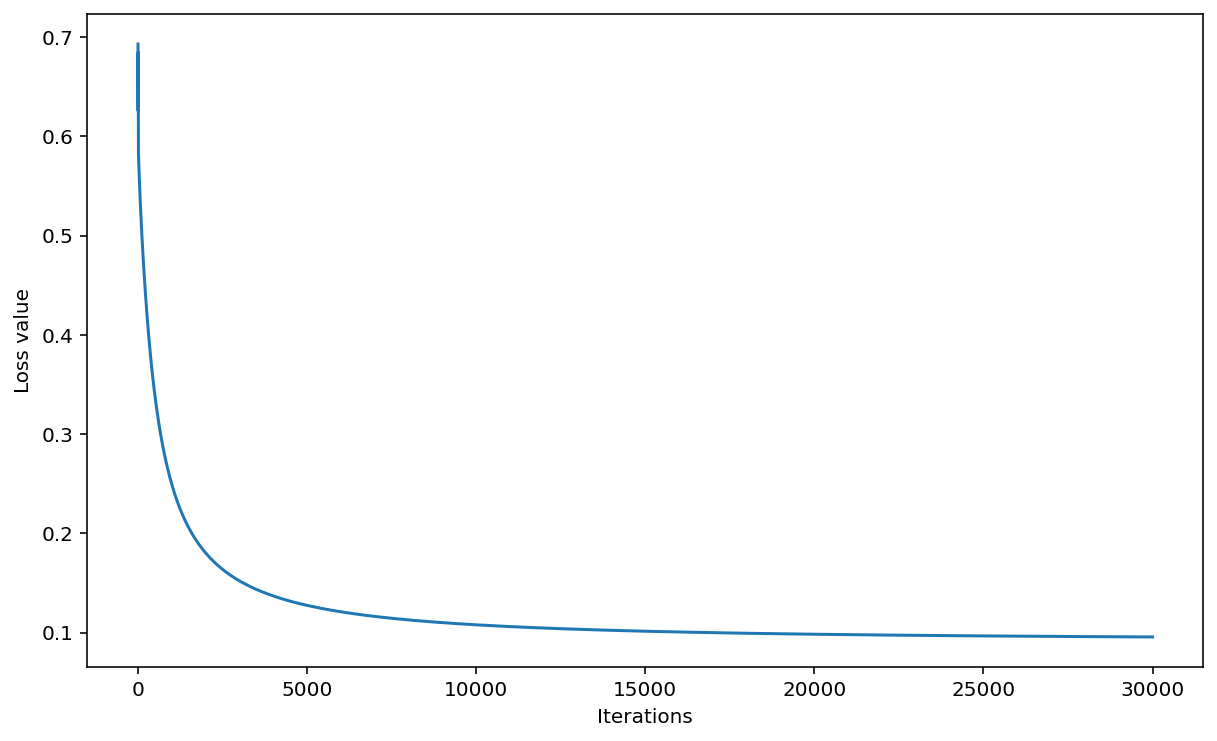

In [ ]:
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 3. Plot the decisoin boundary of the obtained classifier [2pt]
<hr>

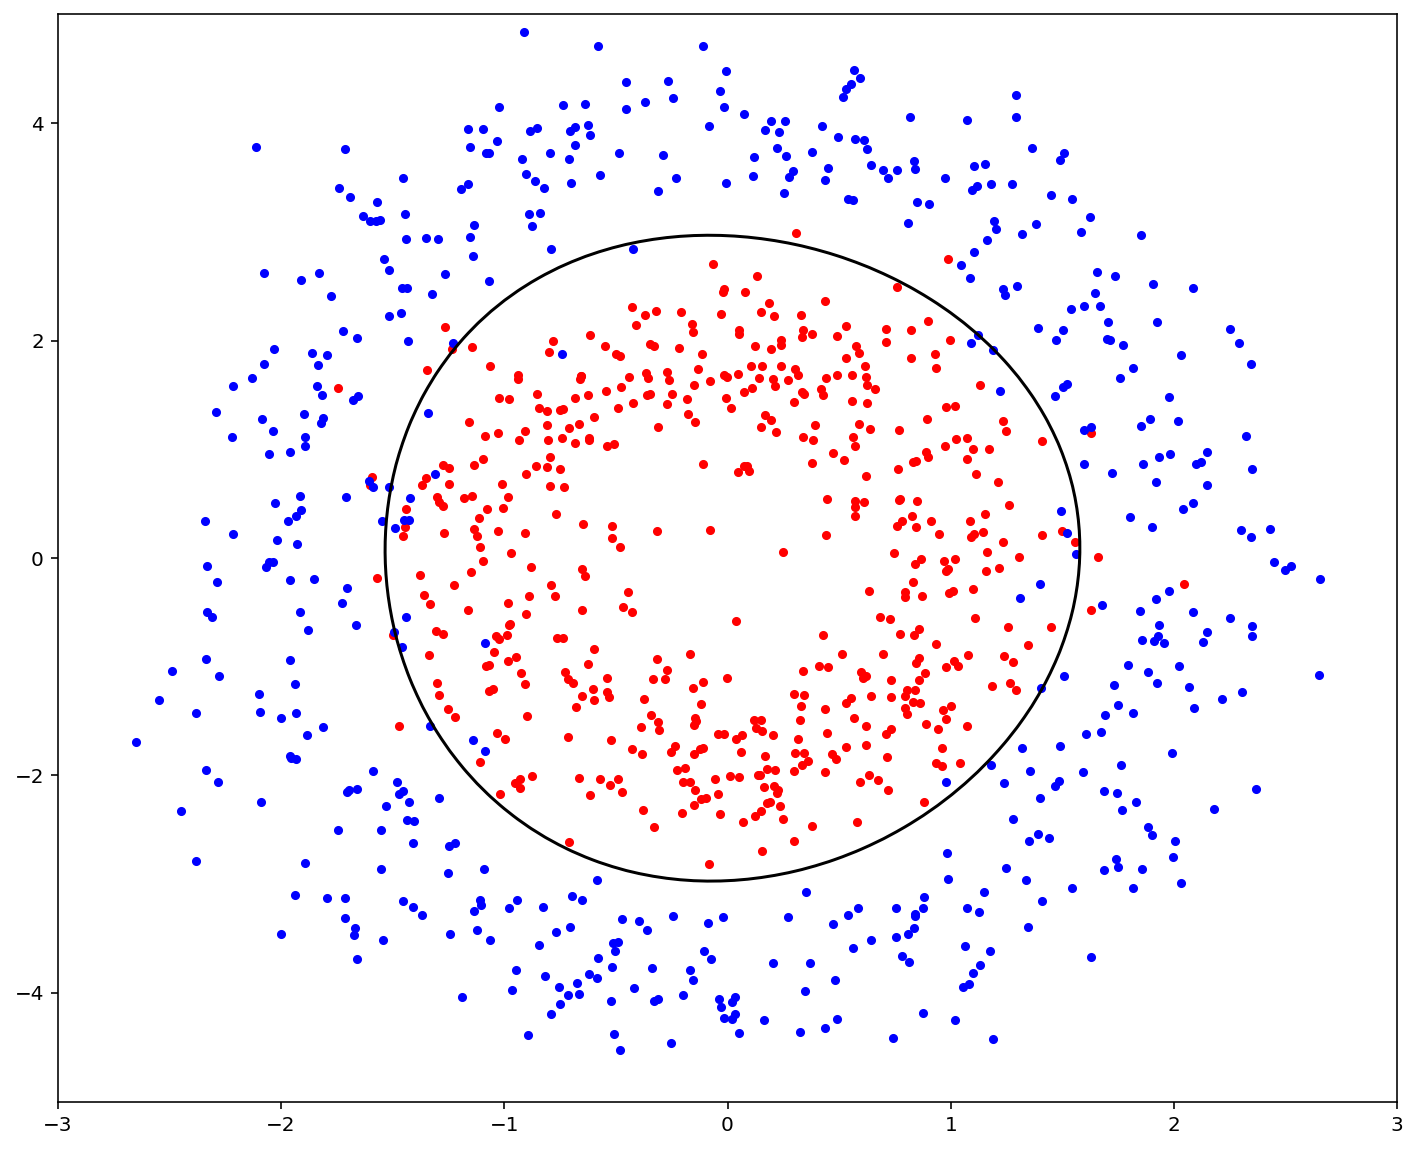

In [13]:
boundary(x1_idx0, x2_idx0, x1_idx1, x2_idx1, w, 3)

## 4. Plot the probability map of the obtained classifier [2pt]
<hr>

In [87]:
boundary_map(x1_idx0, x2_idx0, x1_idx1, x2_idx1, w, 3)

Output hidden; open in https://colab.research.google.com to view.

## 5. Compute the classification accuracy [1pt]
<hr>

total number of data = 1000
total number of correctly classified data =  959
accuracy(%) =  95.89999999999999
